# Implementation of Computer Vision Algorithms

1) Implementation Of Stereo Reconstruction

2) Camera Callibration Using CalTech Camera Calibration method in opencv-python

3) Code to find M find K, and cTw

4) Estimating Fundamental Matrix Using 8 - Point Algorithm

5) Estimating Essential Matrix U

6) 3D Reconstruction

In [0]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cv2
import time
import numpy as np
from mpl_toolkits import mplot3d
import glob

# Functions


In [0]:
def show_figure(x_new,y_new):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x_front = np.zeros(6)
    y_front = np.zeros(6)
    x_front[0:5] = x_new[0:5]
    x_front[5]  = x_new[0]
    y_front[0:5] = y_new[0:5]
    y_front[5]  = y_new[0]
    x_back= np.zeros(6)
    y_back= np.zeros(6)
    x_back[0:5] = x_new[5:10]
    x_back[5]  = x_new[5]
    y_back[0:5] = y_new[5:10]
    y_back[5]  = y_new[5]
    x_p = np.zeros(4)
    y_p = np.zeros(4)
    x_p[0] = x_new[2]
    y_p[0] = y_new[2]
    x_p[1] = x_new[4]
    y_p[1] = y_new[4]
    x_p[2] = x_new[9]
    y_p[2] = y_new[9]
    x_p[3] = x_new[7]
    y_p[3] = y_new[7]

    line1 = Line2D(x_front, y_front)
    ax.add_line(line1)
    line2 = Line2D(x_back, y_back)
    ax.add_line(line2)
    line3 = Line2D(x_p, y_p)
    ax.add_line(line3)

    for i in range(5):
        line = Line2D(x_new[i:i+6:5],y_new[i:i+6:5])
        ax.add_line(line)


    ax.set_xlim(min(x_new), max(x_new))
    ax.set_ylim(min(y_new), max(y_new)) 
    plt.show()
    # keyboard.wait('n')
    # plt.close()

    return 0

def get_T(cam_pos):
    T = np.zeros((3,3))
    x_ = 0- cam_pos
    y_ = 0- cam_pos
    z_ = 0- cam_pos
    if y_[2]==0:
        y_ = np.array([[0],[0],[1]])
    else:
        y_ [2] = -(y_[0]**2+y_[1]**2)/y_[2]

    x_ =  np.array([x_[1],-x_[0],[0]])
    x_=x_/np.sum(np.square(x_))**0.5
    y_=y_/np.sum(np.square(y_))**0.5
    z_=z_/np.sum(np.square(z_))**0.5
    R_ = np.concatenate([x_, y_, z_],axis=1)
    R =np.transpose(R_)
    t =-np.dot(R,cam_pos)
    T = np.concatenate([R,t],axis=1)
    return (T)

    
def show_3d(xi,yi,zi):
      x = xi
      y = yi
      z = np.vstack((zi, zi))
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')
      ax.plot_wireframe(x[:5], y[:5], z[:, :5])
      ax.plot_wireframe(x[5:], y[5:], z[:, 5:])
      ax.plot_wireframe(np.array([x[0], x[5]]), np.array([y[0], y[5]]), np.array([z[:, 0], z[:, 5]]))
      ax.plot_wireframe(np.array([x[1], x[6]]), np.array([y[1], y[6]]), np.array([z[:, 1], z[:, 6]]))
      ax.plot_wireframe(np.array([x[2], x[7]]), np.array([y[2], y[7]]), np.array([z[:, 2], z[:, 7]]))
      ax.plot_wireframe(np.array([x[3], x[8]]), np.array([y[3], y[8]]), np.array([z[:, 3], z[:, 8]]))
      ax.plot_wireframe(np.array([x[4], x[9]]), np.array([y[4], y[9]]), np.array([z[:, 4], z[:, 9]]))
      ax.plot_wireframe(np.array([x[4], x[0]]), np.array([y[4], y[0]]), np.array([z[:, 4], z[:, 0]]))
      ax.plot_wireframe(np.array([x[9], x[5]]), np.array([y[9], y[5]]), np.array([z[:, 9], z[:, 5]]))
      ax.set_title('3D Image')
      plt.show()
      return 1

# Initilization


Original left image


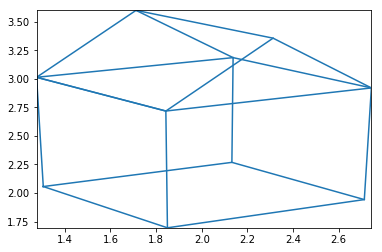

Original right image


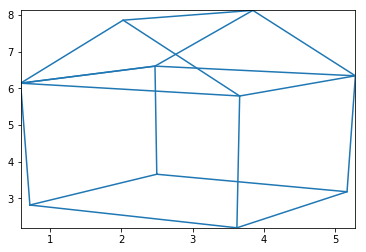

Original 3d


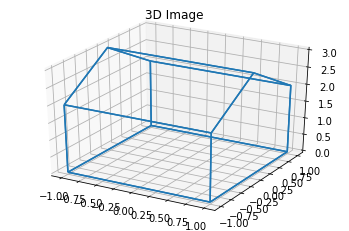

In [159]:
#Points w.r.t world coordinate frame
x = [1, 1,  1,  1,  1,  -1,  -1,  -1,  -1,  -1]
y = [-1, 1,  1,  0,  -1,  -1,  1,   1,   0,   -1]
z = [0,  0,  2,  3,   2,  0,  0,   2,    3,   2]
w = np.ones(10)
#Concate the points
coordinate = np.concatenate([x, y, z,w],axis=0)
coordinate =coordinate.reshape(4,-1)
t = np.zeros((5,3,1))
T =np.zeros((5,3,4))

#left camera
t[0] = np.array([[15],[-10],[8]])
#right camera
t[1] = np.array([[10],[6],[4]])

for k in range(2):
    #get the transform matrix
    T[k] = get_T(t[k])

Minl = np.array([[10,0,2],[0,10,2],[0,0,1]])
Minr = np.array([[20,0,3],[0,20,3],[0,0,1]])
Cl = np.dot(Minl,np.dot(T[0],coordinate))
x_l = Cl[0,:]/Cl[2,:]
y_l = Cl[1,:]/Cl[2,:]
print('Original left image')
show_figure(x_l,y_l)

Cr = np.dot(Minr,np.dot(T[1],coordinate))
x_r = Cr[0,:]/Cr[2,:]
y_r = Cr[1,:]/Cr[2,:]
print('Original right image')
show_figure(x_r,y_r)

print('Original 3d')
show_3d(x,y,z)


k= np.array([[0,0,0,1]])
a = np.zeros(10)

Tl=np.concatenate([T[0],k],axis=0)
# print (Tl)
Tr=np.concatenate([T[1],k],axis=0)
l_Tr = Tl.dot(np.linalg.inv(Tr))
#get the transform matrix between two cameras
l_T_r = l_Tr[0:3,:]
# print(l_T_r)
z = np.ones((10))
im_l = np.concatenate([x_l,y_l,z],axis=0)
im_l = (im_l.reshape(3,-1))
# print(im_l)
im_r = np.concatenate([x_r,y_r,z],axis=0)
im_r = (im_r.reshape(3,-1))

c_l =np.linalg.inv(Minl).dot(im_l) 
c_r =np.linalg.inv(Minr).dot(im_r) 
# print(c_l[:,0])

l_R_r = l_T_r[:,0:3]
l_t_r = l_T_r[:,-1]



# P1 : Stereo Reconstruction

In [34]:
#P1
c_r_new =c_r
for i in range(10):
    d1 = l_R_r[0,:].dot(c_r[:,i])*c_l[1,i]
    d2 = l_R_r[1,:].dot(c_r[:,i])*c_l[0,i]
    a[i] = (l_T_r[1,-1]*c_l[0,i] - l_T_r[0,-1]*c_l[1,i])/(d1-d2)
    c_r_new[:,i]=c_r[:,i]*a[i]
T_r = np.linalg.inv(Tr)
c = np.ones((1,10))

c_r_new = np.concatenate([c_r_new,c],axis=0)
pw = T_r.dot(c_r_new)
# print(pw[0:3,:])
print('error at each point\n',(pw-coordinate)[0:3,:].T)
print('error=',sum(sum(np.square(pw-coordinate))))

error at each point
 [[ 1.77635684e-15 -8.88178420e-16 -8.88178420e-16]
 [ 5.32907052e-15  1.77635684e-15  8.88178420e-16]
 [ 1.77635684e-15 -8.88178420e-16 -8.88178420e-16]
 [ 1.77635684e-15 -8.88178420e-16  0.00000000e+00]
 [ 3.55271368e-15  0.00000000e+00 -4.44089210e-16]
 [ 7.10542736e-15  3.55271368e-15  8.88178420e-16]
 [ 1.77635684e-15 -8.88178420e-16 -8.88178420e-16]
 [ 1.77635684e-15 -8.88178420e-16 -8.88178420e-16]
 [ 3.55271368e-15  0.00000000e+00  0.00000000e+00]
 [ 1.77635684e-15 -8.88178420e-16 -1.33226763e-15]]
error= 1.5027800244460275e-28


# P2 : Camera Callibration Using CalTech Camera Calibration method in opencv-python

References:  
1: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html 
2:https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#calibratecamera

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
a=5
b=4
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((a*b,3), np.float32)
objp[:,:2] = np.mgrid[0:a,0:b].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('/content/drive/My Drive/checkboards/*.jpg')
count = 0;
for fname in images:
    count +=1
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (a,b),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        # print(count,'Detect success')

        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
    else:
        print(count,'Detect fail')
        

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
K = mtx

print('\n K')
print(K)


 K
[[571.94840626   0.         395.66414946]
 [  0.         572.40854234 299.42619766]
 [  0.           0.           1.        ]]


In [203]:
i = 0
R = cv2.Rodrigues(rvecs[i])
t = tvecs[i]
T = np.hstack((R[i], t))
print('T')
print(T)
print('M')
M=np.dot(K, T)
print(M)

T
[[-3.96084526e-01  9.18169764e-01  9.01850368e-03 -2.59214590e+00]
 [-9.02501621e-01 -3.87478758e-01 -1.88018712e-01  2.90463244e+00]
 [-1.69138618e-01 -8.26105166e-02  9.82124040e-01  1.32111787e+01]]
M
[[-2.93462001e+02  4.92459713e+02  3.93749392e+02  3.74461608e+03]
 [-5.67244171e+02 -2.46531904e+02  1.86450150e+02  5.61840944e+03]
 [-1.69138618e-01 -8.26105166e-02  9.82124040e-01  1.32111787e+01]]


# P3 : Code to find M find K, and cTw


In [212]:
#P3
A = np.zeros((2*10,12))
for i in range(10):
    A[2*i]  = [x[i],y[i],z[i],1,0,0,0,0,-im_l[0,i]*x[i],-im_l[0,i]*y[i],-im_l[0,i]*z[i],-im_l[0,i]]
    A[2*i+1]= [0,0,0,0,x[i],y[i],z[i],1,-im_l[1,i]*x[i],-im_l[1,i]*y[i],-im_l[1,i]*z[i],-im_l[1,i]]
    
[u, s, v] = np.linalg.svd(A, full_matrices=True)
m = v[-1,:]
M =m.reshape(3,4)
[u, s, v] = np.linalg.svd(M, full_matrices=True)
t = v[-1,:]
q, r = np.linalg.qr(np.linalg.inv(M[:,0:3]))
R = np.linalg.inv(q)
K = np.linalg.inv(r)
T = np.concatenate([R,t[0:3].reshape(3,1)],axis = 1)
print('K')
print(K)
print('R')
print(R)

K
[[ 1.16831458e-18 -1.85962943e-16 -6.51263574e-02]
 [ 0.00000000e+00  1.41309335e-15  7.03828178e-01]
 [ 0.00000000e+00  0.00000000e+00  1.96074784e-02]]
R
[[-5.56164673e-01  8.31072113e-01  3.05274495e-17]
 [-8.31072113e-01 -5.56164673e-01  2.12964835e-15]
 [ 1.78686964e-15  1.15906466e-15  1.00000000e+00]]


# P5 : Estimating Fundamental Matrix Using 8 - Point Algorithm



In [109]:
#P5
B = np.zeros((10,9))
for i in range(10):
    B[i]=[im_l[0,i]*im_r[0,i], im_l[0,i]*im_r[1,i], im_l[0,i], im_l[1,i]*im_r[0,i], im_l[1,i]*im_r[1,i], im_l[1,i], im_r[0,i], im_r[1,i], 1]
    
[u, s, v] = np.linalg.svd(B, full_matrices=True)
f = v[-1,:]
F =np.transpose(f.reshape(3,3))
print('F')
print(F)

F
[[-0.0097682  -0.00786563  0.12079385]
 [-0.03481974 -0.00341458  0.35166531]
 [ 0.27479222 -0.87734522  0.1229374 ]]


# P6 : Estimate the Essential Matrix U


In [112]:
C = np.zeros((10,9))
for i in range(10):
    C[i]=[c_l[0,i]*c_r[0,i], c_l[0,i]*c_r[1,i], c_l[0,i], c_l[1,i]*c_r[0,i], c_l[1,i]*c_r[1,i], c_l[1,i], c_r[0,i], c_r[1,i], 1]
    
[u, s, v] = np.linalg.svd(C, full_matrices=True)
e = v[-1,:]
E =np.transpose(e.reshape(3,3))
# E = (Minl.T).dot(F).dot(Minr)
print('E')
print(E)

E
[[ 1.48323251e-01  1.19434037e-01 -1.29865533e-01]
 [ 5.28713398e-01  5.18479472e-02 -4.17866848e-01]
 [-1.07070861e-01  6.91785898e-01  1.11022302e-16]]


# P7 :  3D reconstruction 


In [0]:
W = np.array([[0,-1,0],[1,0,0],[0,0,1]])
Z = np.array([[0,1,0],[-1,0,0],[0,0,0]])
[u, s, v] = np.linalg.svd(E, full_matrices=True)
S = u.dot(Z).dot(np.transpose(u))
R = u.dot(W).dot(v)
t = u[:,-1]

tl = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
M_L = Minl.dot(tl)

tr = np.concatenate([R,t.reshape(3,1)],axis = 1)
M_R = Minr.dot(tr)

# M_L =np.concatenate([M_L,k],axis=0)
# M_R =np.concatenate([M_R,k],axis=0)
# wp = np.linalg.inv(M_L).dot(np.concatenate([im_l,z.reshape(1,-1)],axis=0))
# wp /=wp[3]

wp = cv2.triangulatePoints(M_L,M_R,im_l[0:2,:],im_r[0:2,:])
wp /=wp[3]


left camera view


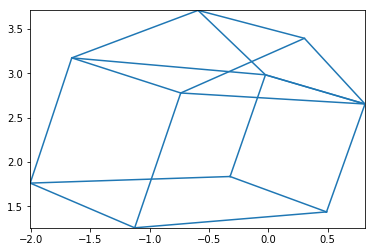

right camera view


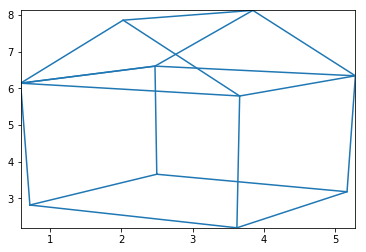

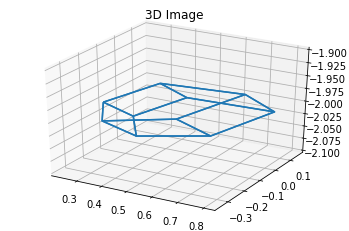

Because sign ambiguity,here are 4 cases and two of them can be correctly shown with my API but the other two can not 
because their order dont fit my method.
So here I show one of the correct figure


In [211]:
M_l_2d =np.concatenate([M_L,k],axis=0)
M_r_2d =np.concatenate([M_R,k],axis=0)

im_l_2d = M_l_2d.dot(wp)
im_l_2d /= im_l_2d[2]
im_r_2d = M_r_2d.dot(wp)
im_r_2d /= im_r_2d[2]

print('left camera view')
show_figure(im_l_2d[0],im_l_2d[1])
print('right camera view')
show_figure(im_r_2d[0],im_r_2d[1])
show_3d(wp[0],wp[1],wp[2])
print('Because sign ambiguity,here are 4 cases and two of them can be correctly shown with my API but the other two can not \nbecause their order dont fit my method.\nSo here I show one of the correct figure')

# P8 : Euclidian 3D reconstruction


In [0]:
wp2= cv2.triangulatePoints(Minl.dot(Tl[0:3]),Minr.dot(Tr[0:3]),im_l[0:2,:],im_r[0:2,:])
wp2/= wp2[3]

left camera view


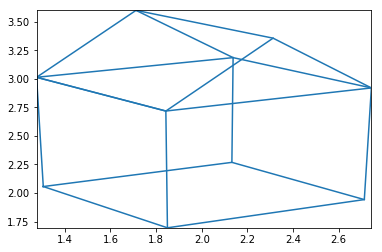

right camera view


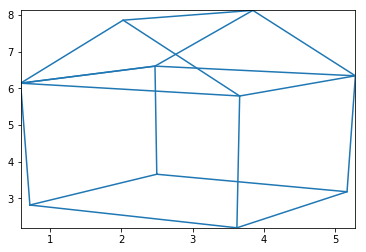

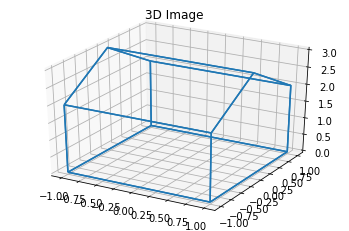

1

In [132]:
im_l_2 = Minl.dot(Tl[0:3]).dot(wp2)
im_l_2 /= im_l_2[2]
im_r_2 = Minr.dot(Tr[0:3]).dot(wp2)
im_r_2 /= im_r_2[2]

print('left camera view')
show_figure(im_l_2[0],im_l_2[1])
print('right camera view')
show_figure(im_r_2d[0],im_r_2d[1])
show_3d(wp2[0],wp2[1],wp2[2])